<a href="https://colab.research.google.com/github/Sujitharasamsetty/Customer-Personality-Analysis/blob/main/Customer%20Personality%20Analysis/Customer_Personality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('marketing_data.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,05-11-2014,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,04-08-2014,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [4]:
data.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,03-07-2013,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12-03-2012,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND
2239,4070,1969,PhD,Married,"$94,871.00",0,2,09-01-2012,99,169,...,4,7,0,1,1,0,0,1,0,CA


In [5]:
data.shape

(2240, 28)

In [6]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [10]:
data.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
 Income                1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Response                  2
Complain                  2
Country                   8
dtype: int64

In [12]:
data_cat = data[['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
                 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country']]

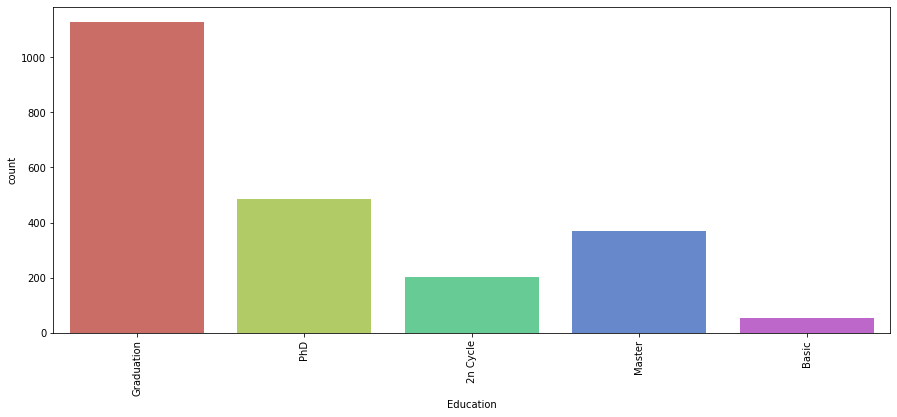

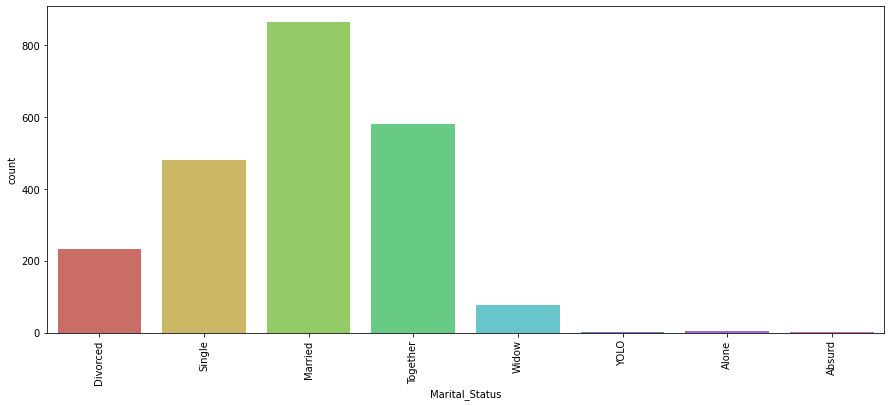

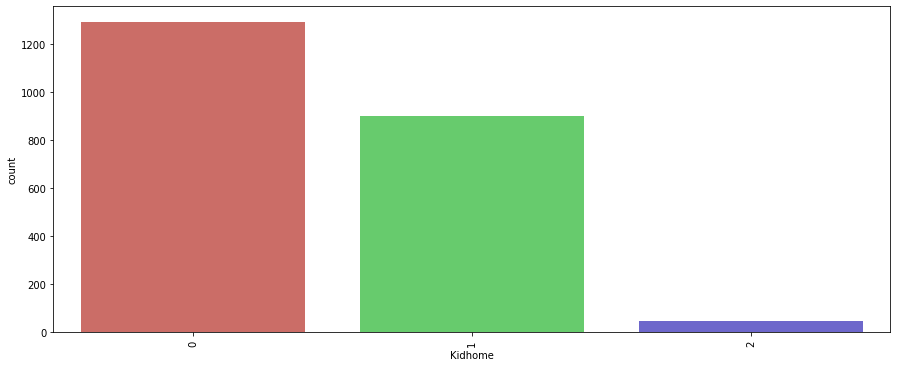

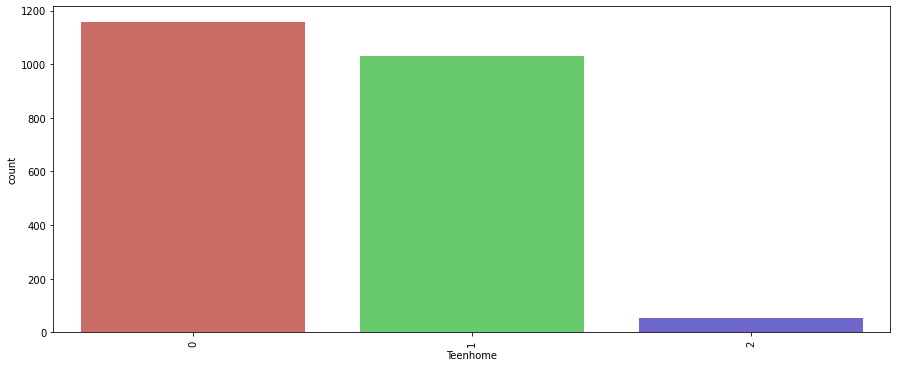

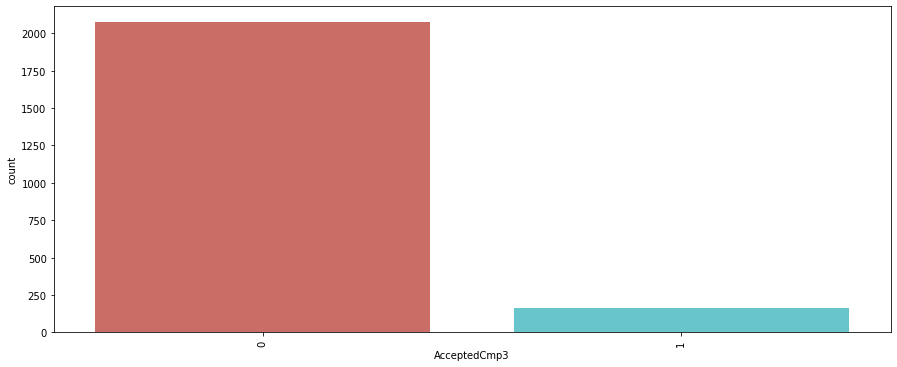

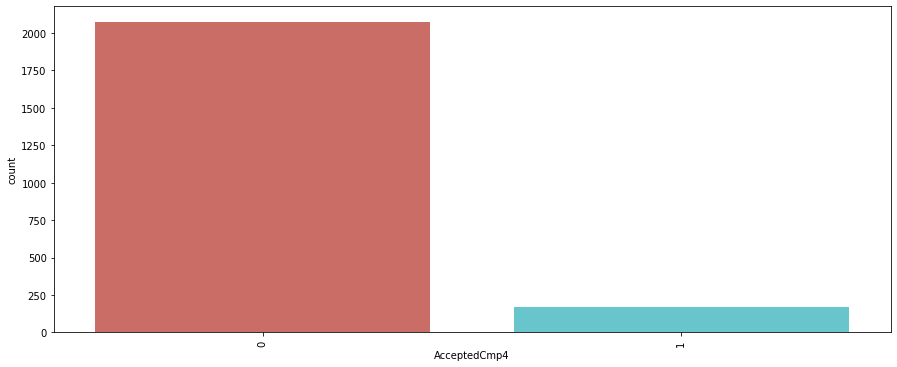

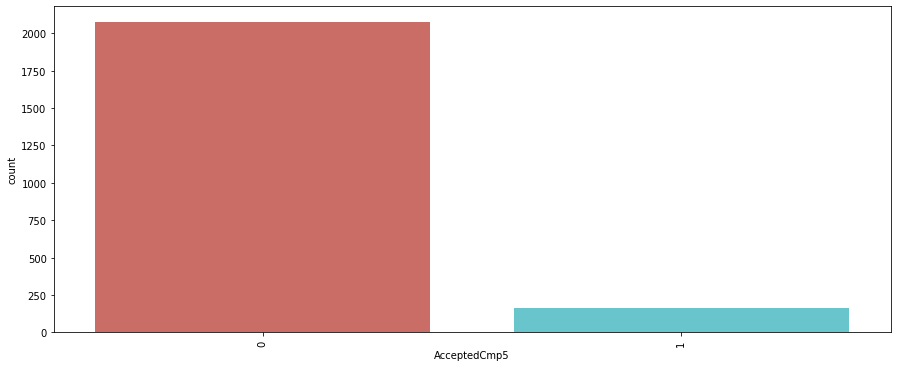

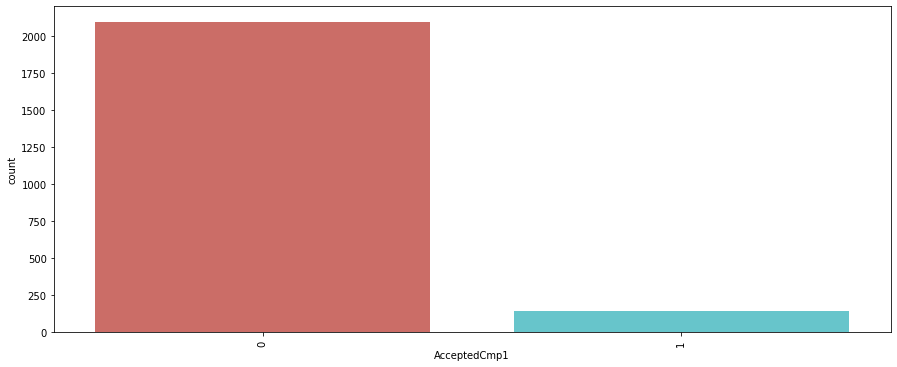

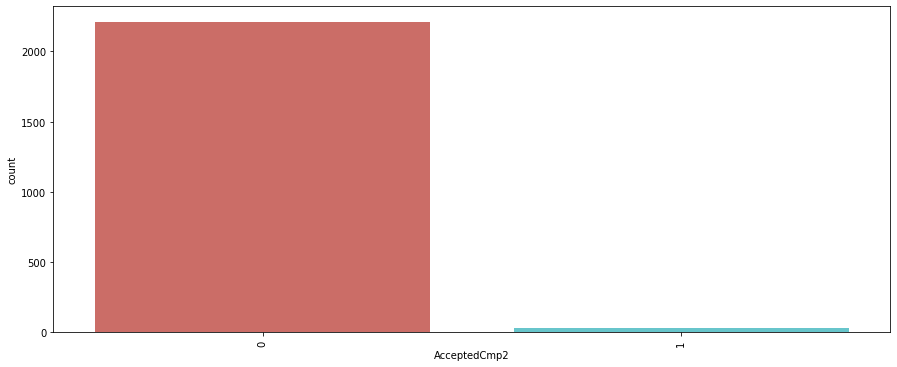

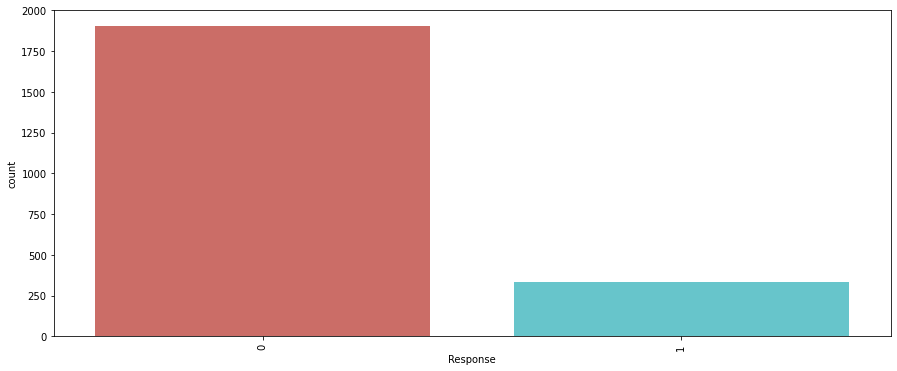

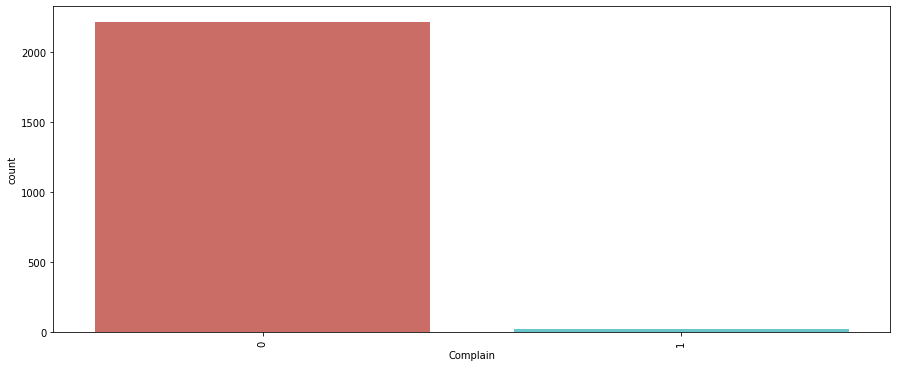

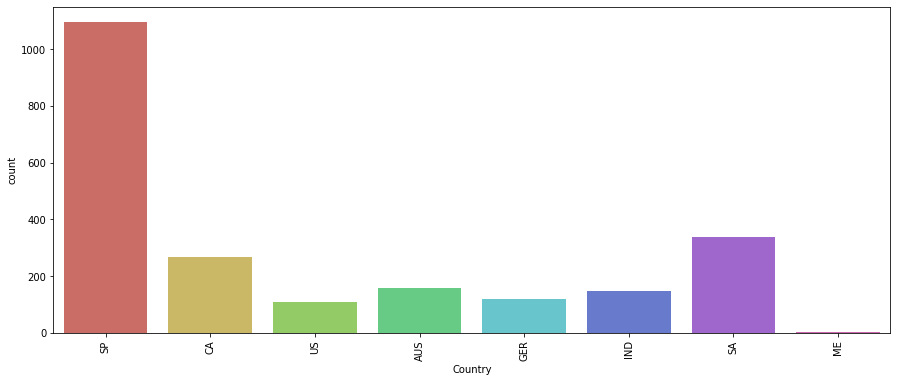

In [13]:
for i in data_cat.columns:
  plt.figure(figsize=(15,6))
  sns.countplot(data_cat[i],data=data_cat,palette='hls')
  plt.xticks(rotation=90)
  plt.show()

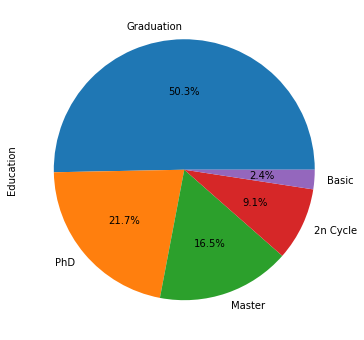

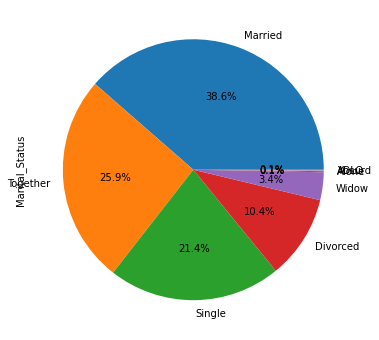

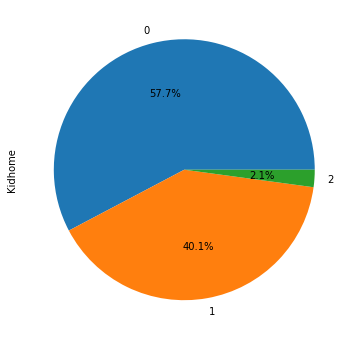

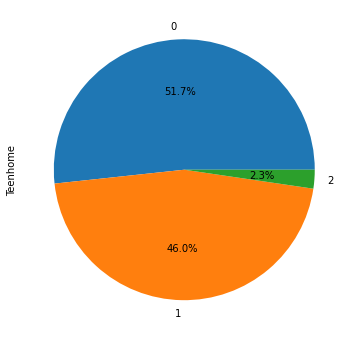

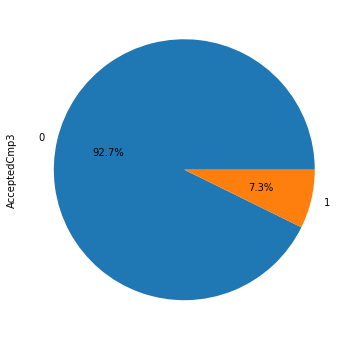

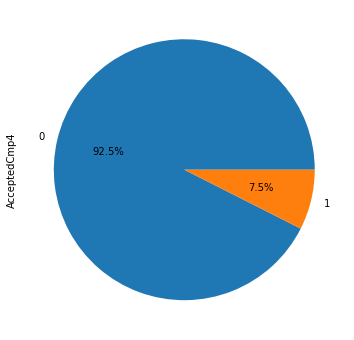

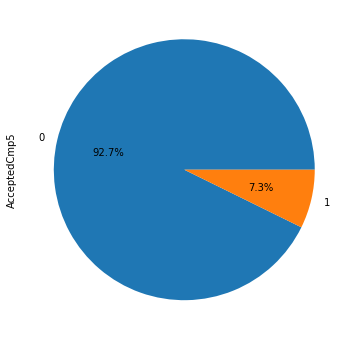

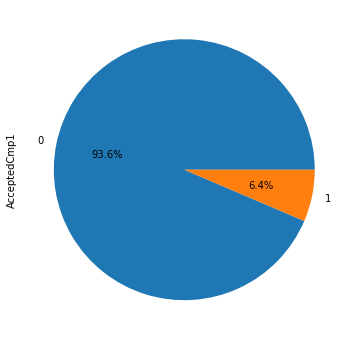

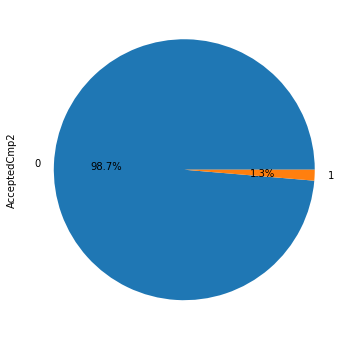

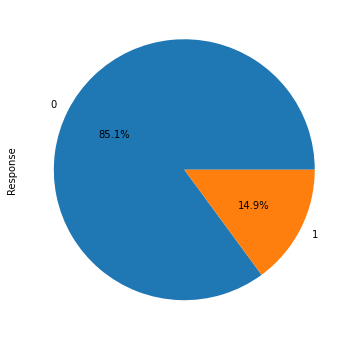

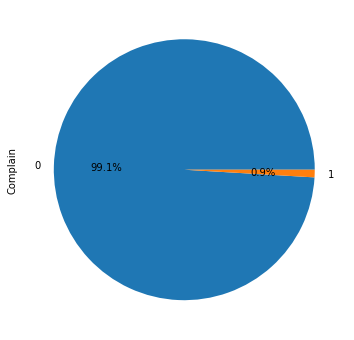

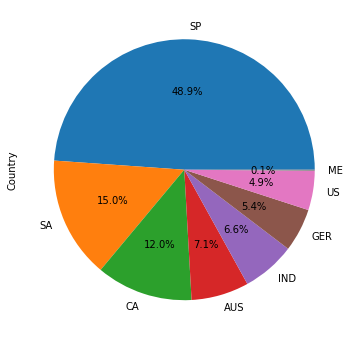

In [14]:
for i in data_cat.columns:
  plt.figure(figsize=(15,6))
  data_cat[i].value_counts().plot(kind='pie',autopct = '%1.1f%%')
  plt.xticks(rotation=90)
  plt.show()

In [15]:
data_num = data[['ID', 'Year_Birth','Kidhome', 'Teenhome', 'Recency', 'MntWines','MntFruits', 'MntMeatProducts', 
                 'MntFishProducts', 'MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','AcceptedCmp3', 'AcceptedCmp4', 
                 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Response', 'Complain']]

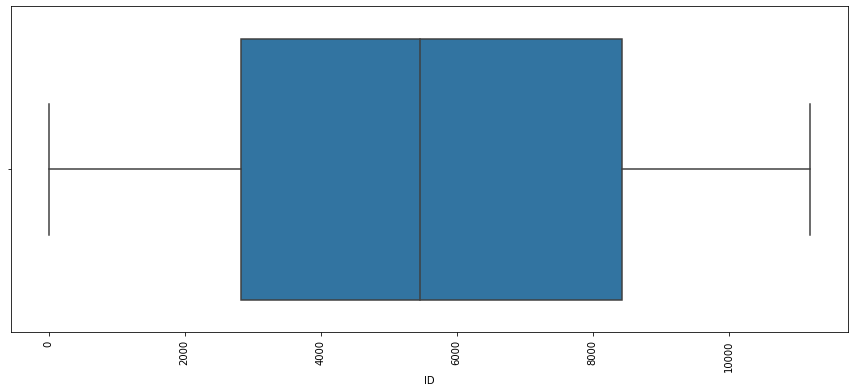

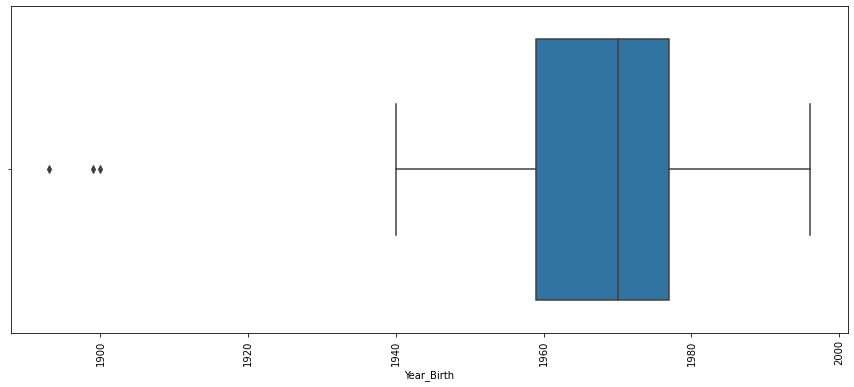

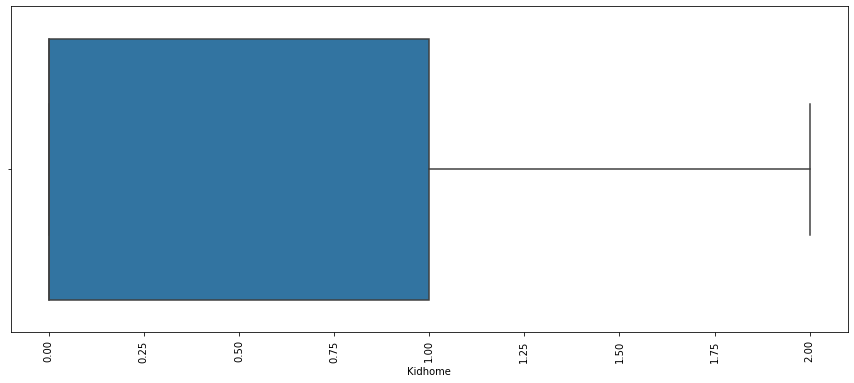

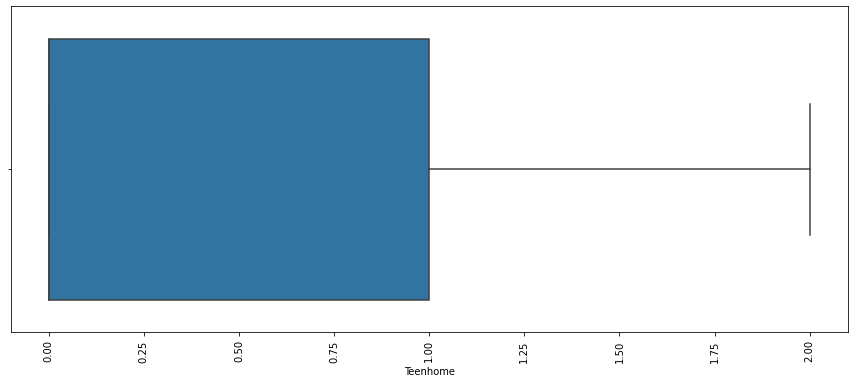

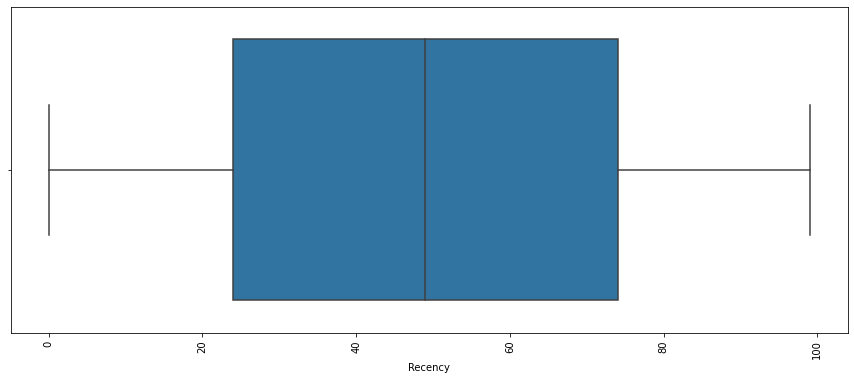

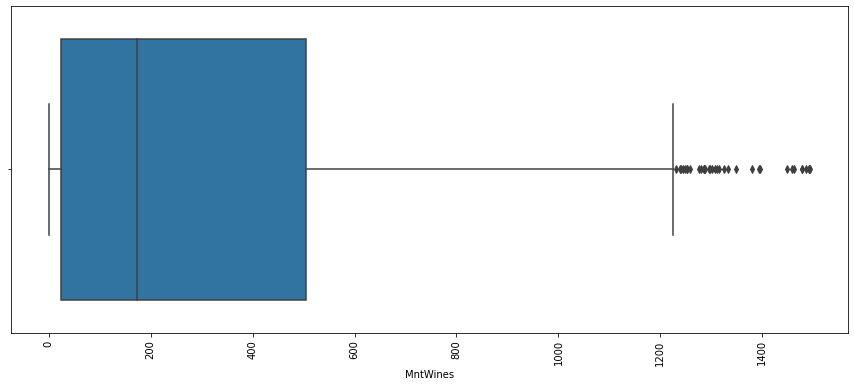

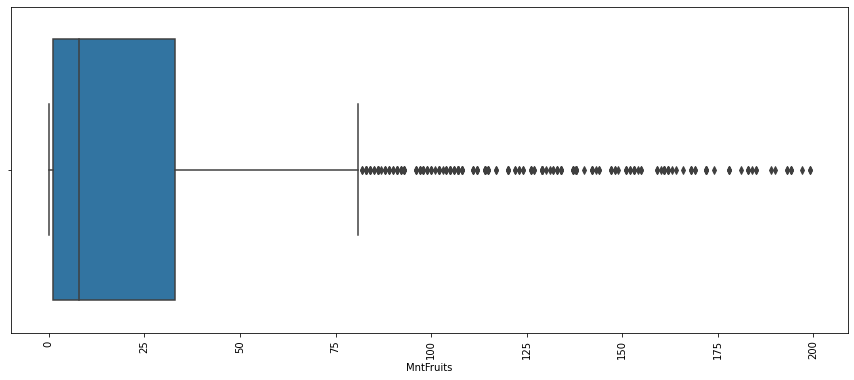

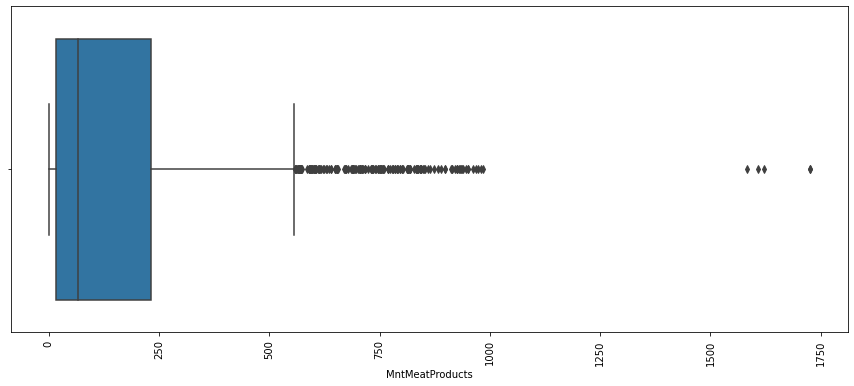

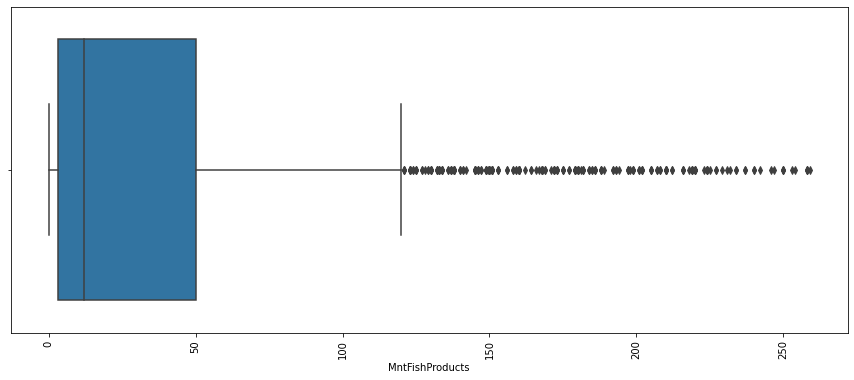

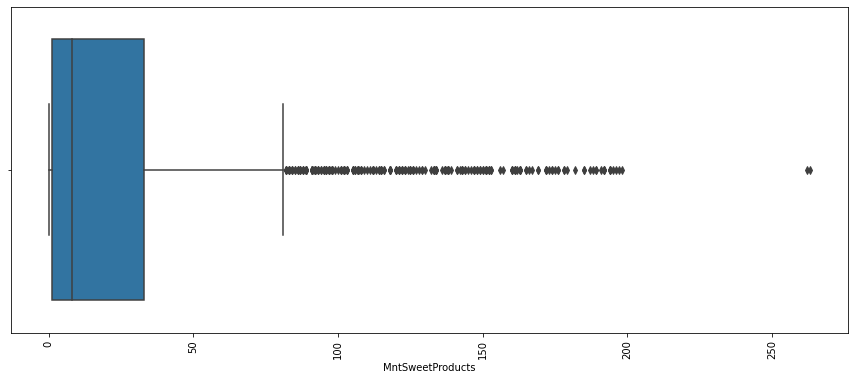

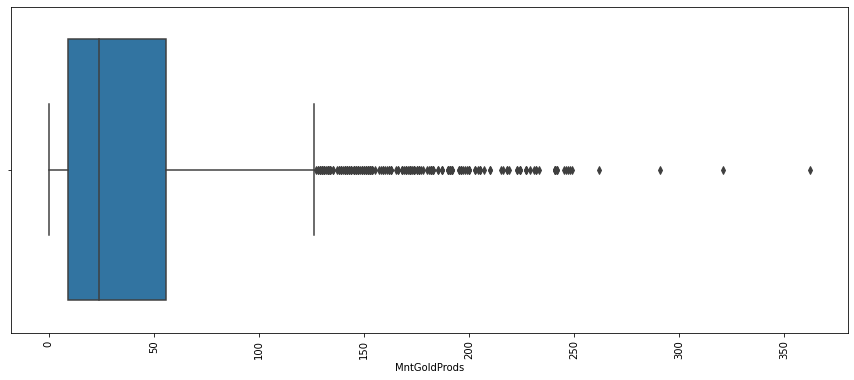

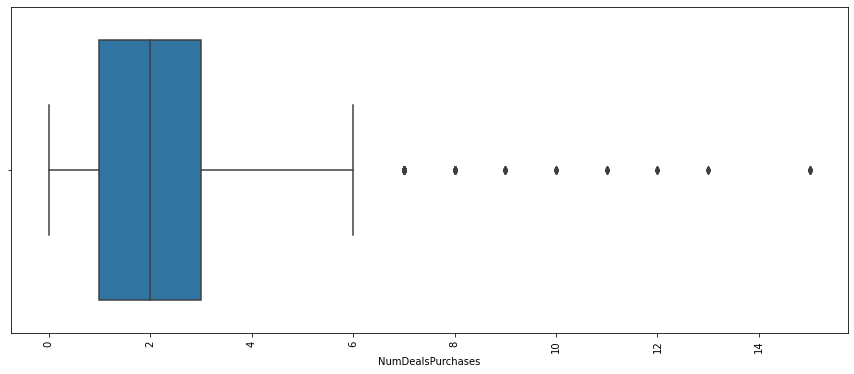

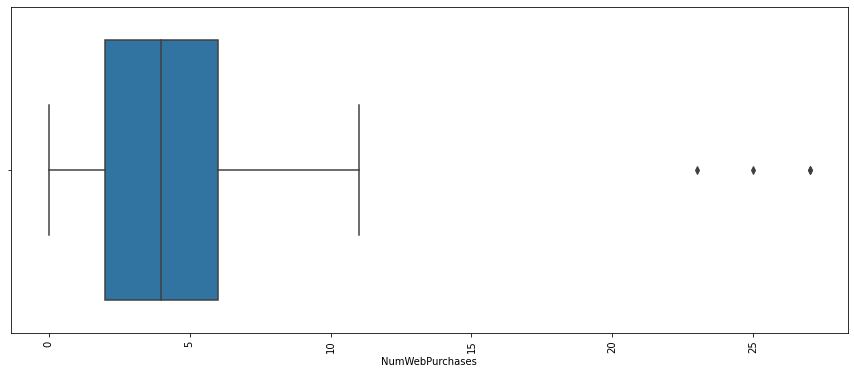

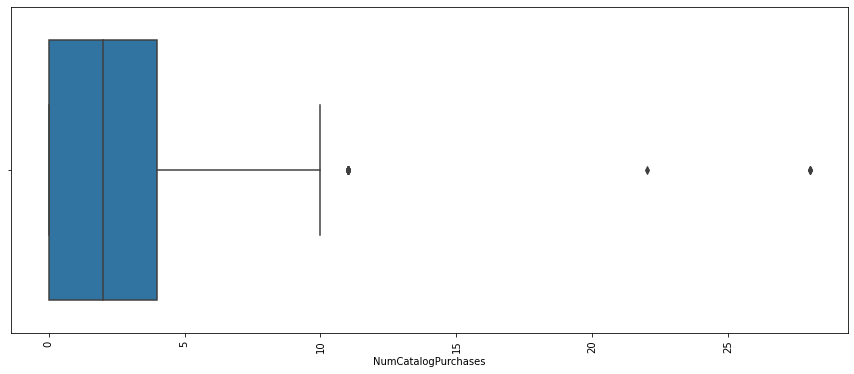

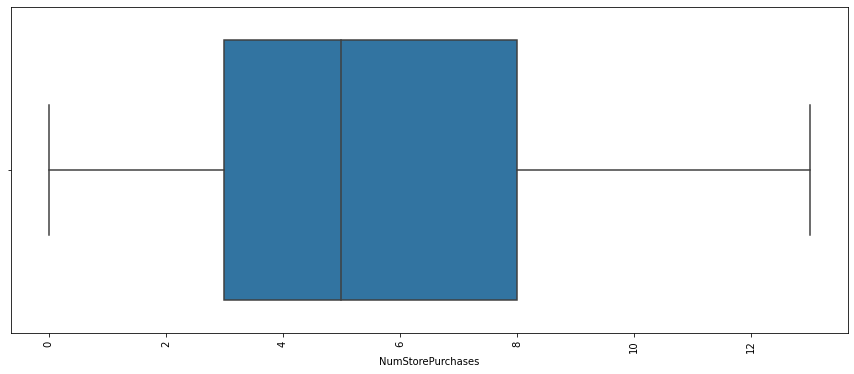

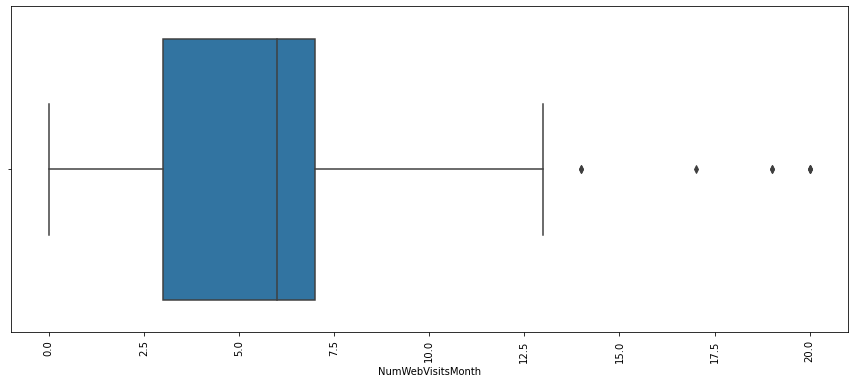

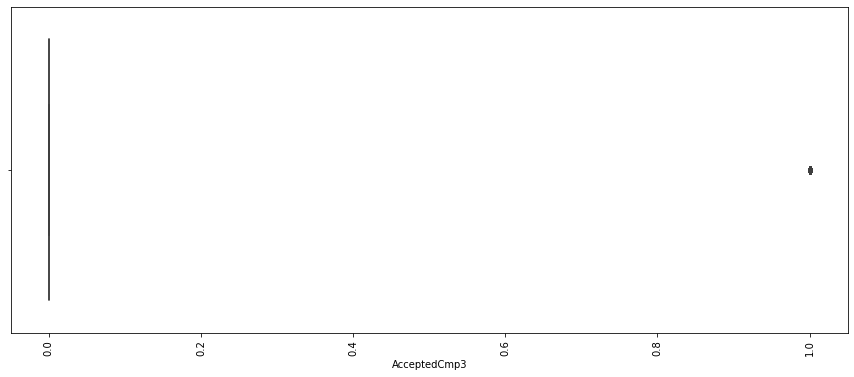

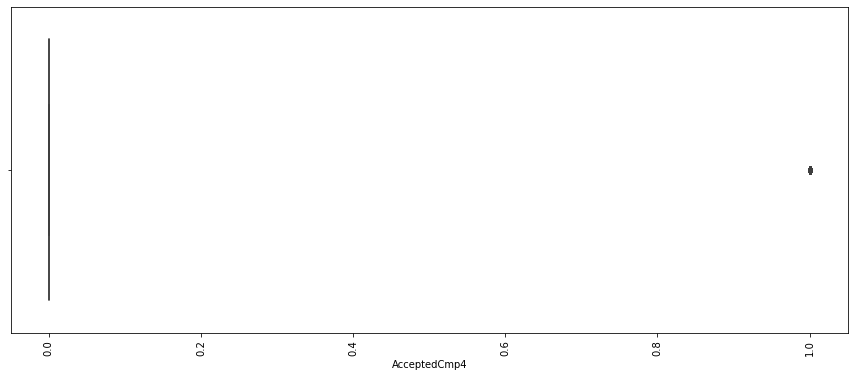

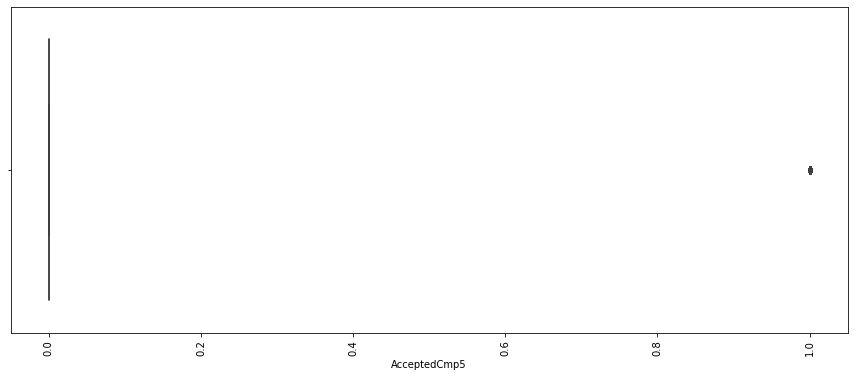

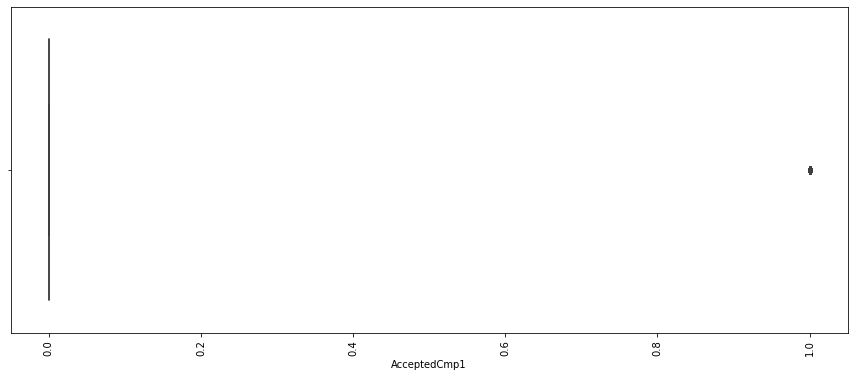

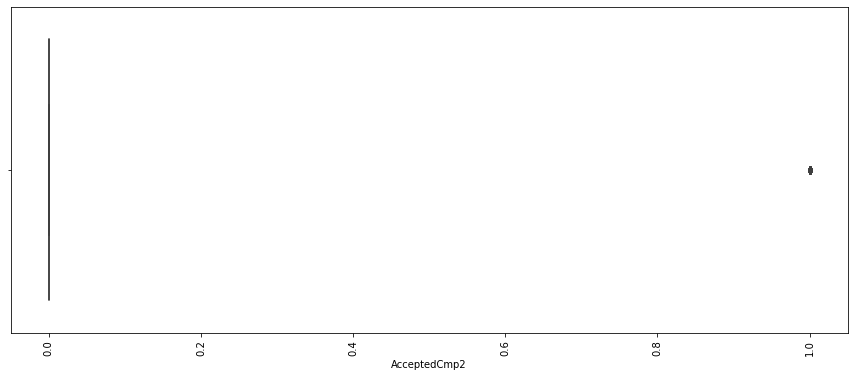

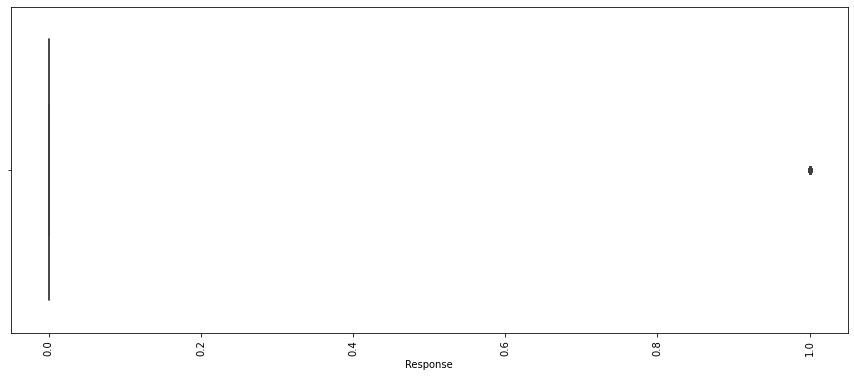

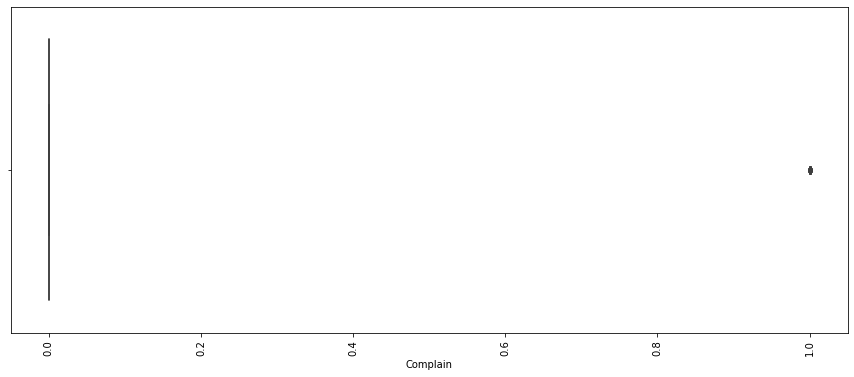

In [16]:
for i in data_num.columns:
  plt.figure(figsize=(15,6))
  sns.boxplot(data_num[i])
  plt.xticks(rotation=90)
  plt.show()


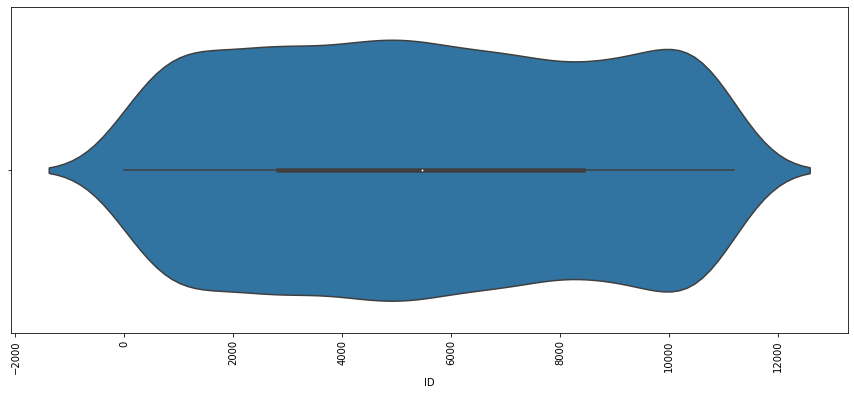

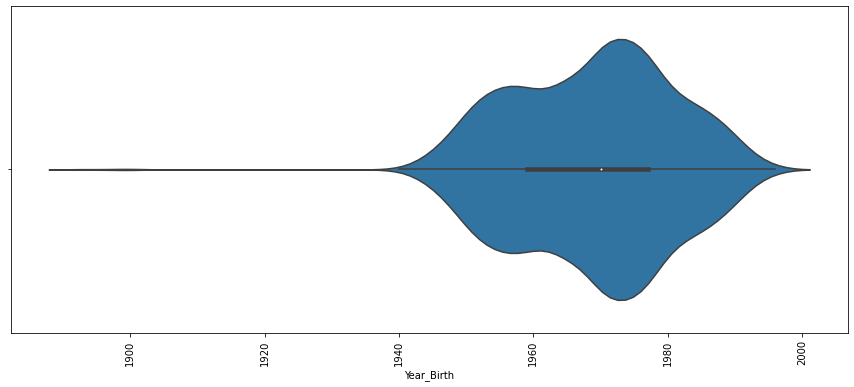

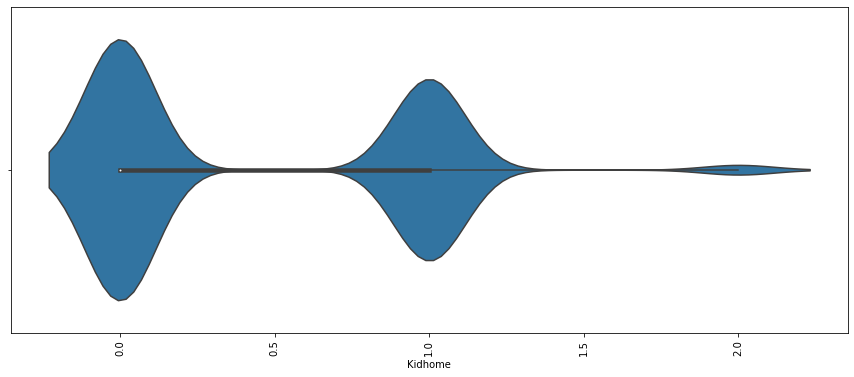

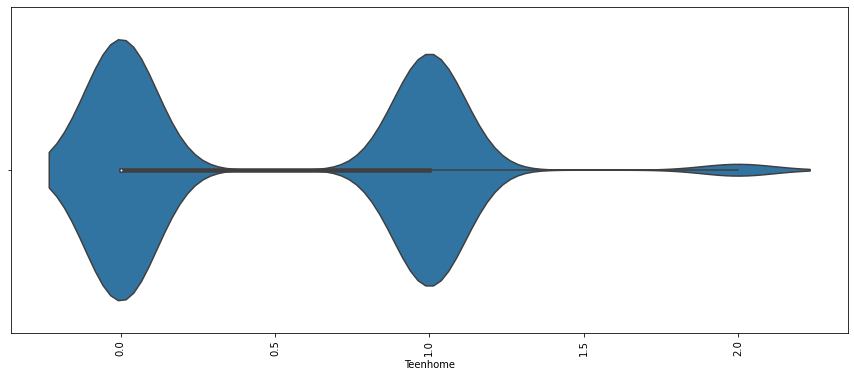

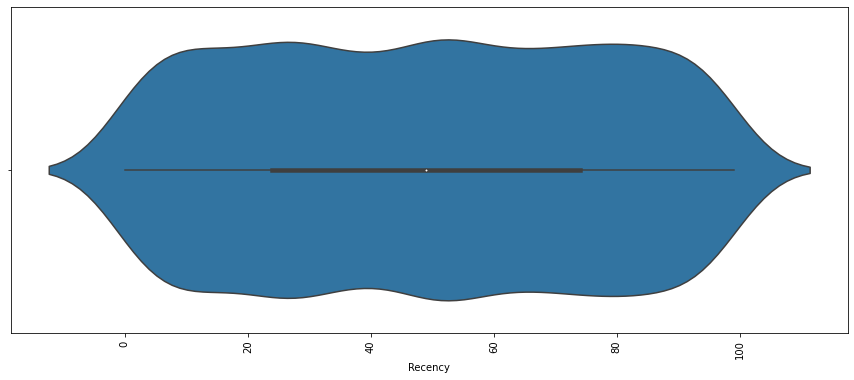

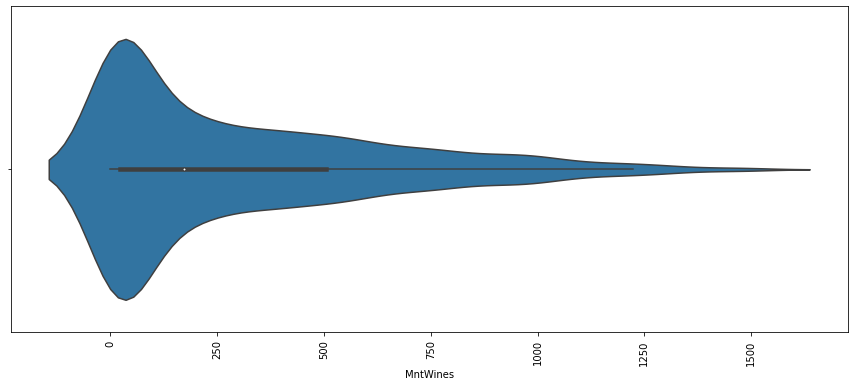

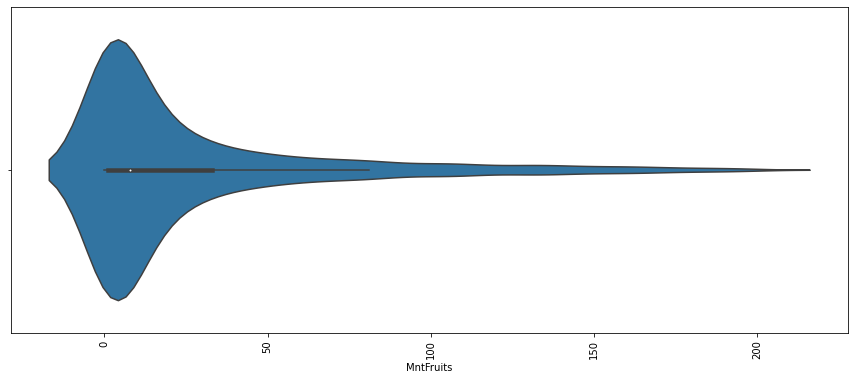

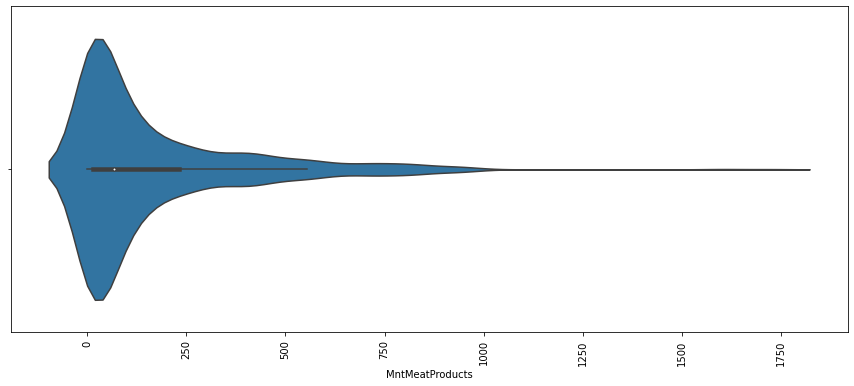

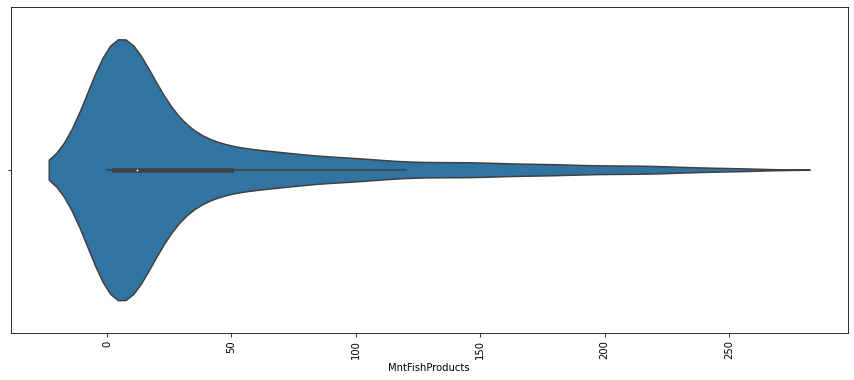

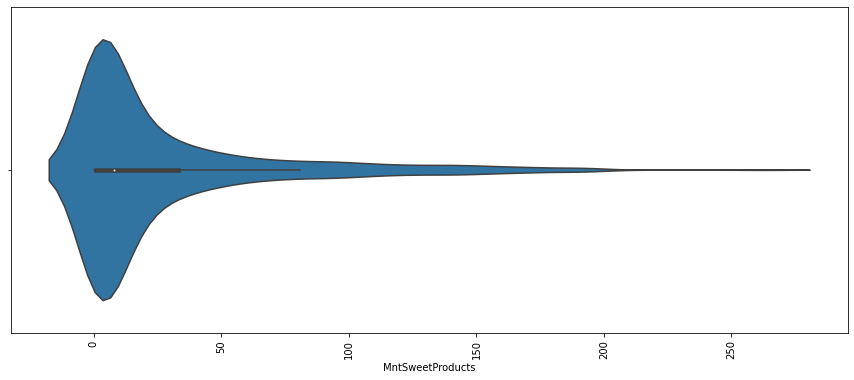

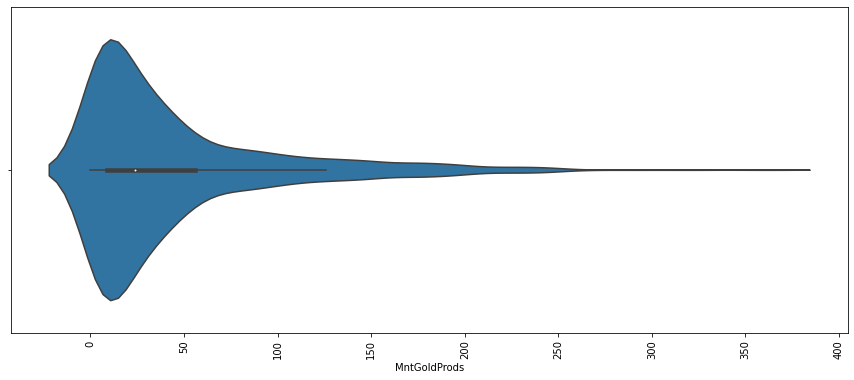

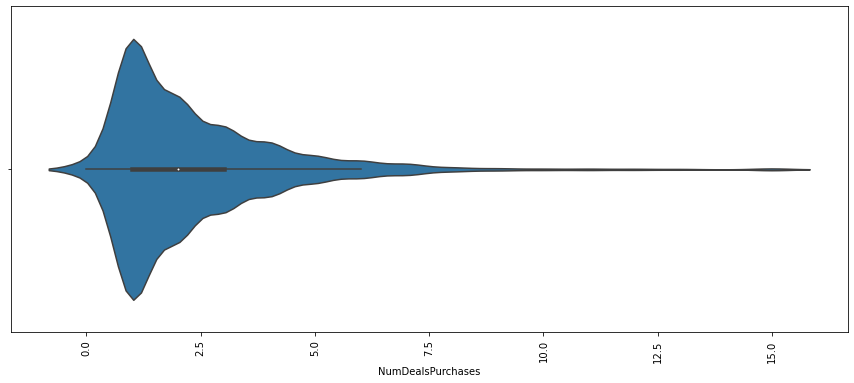

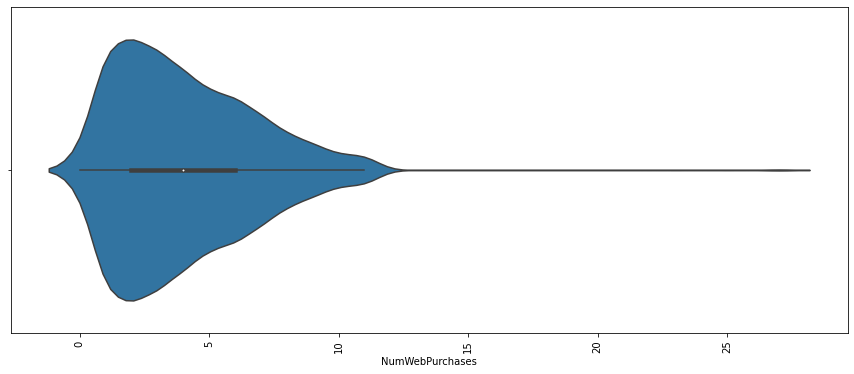

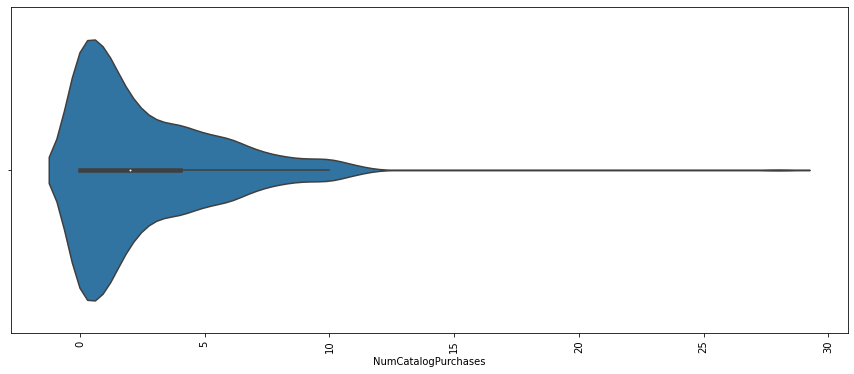

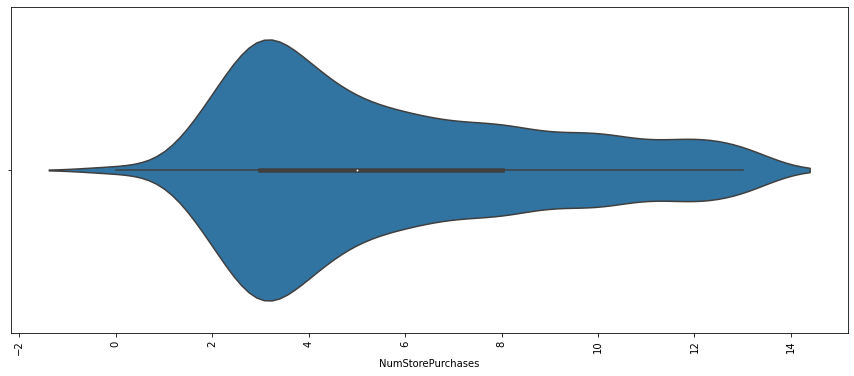

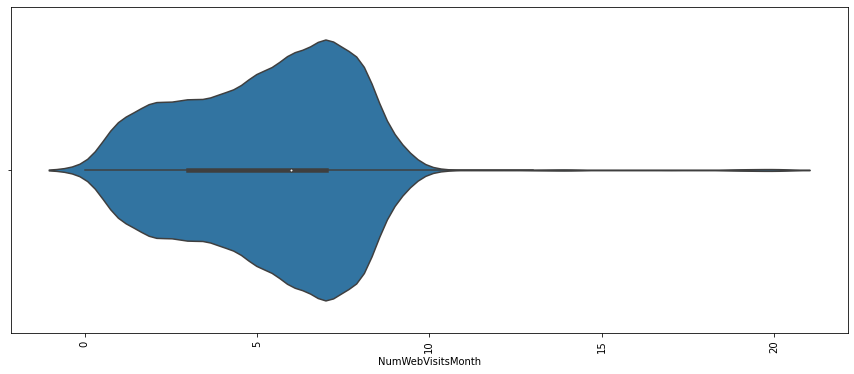

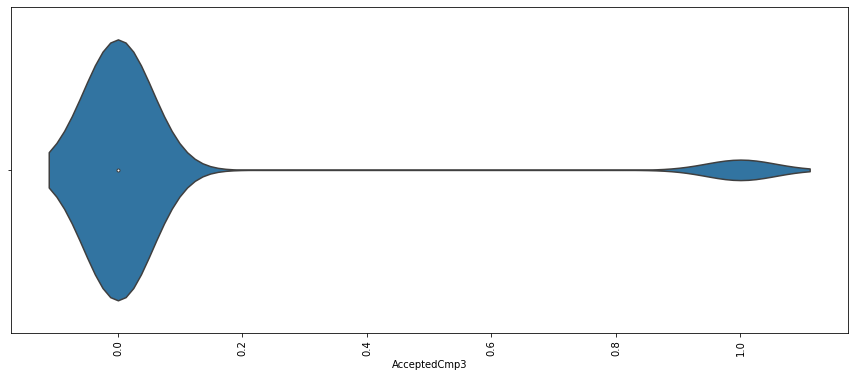

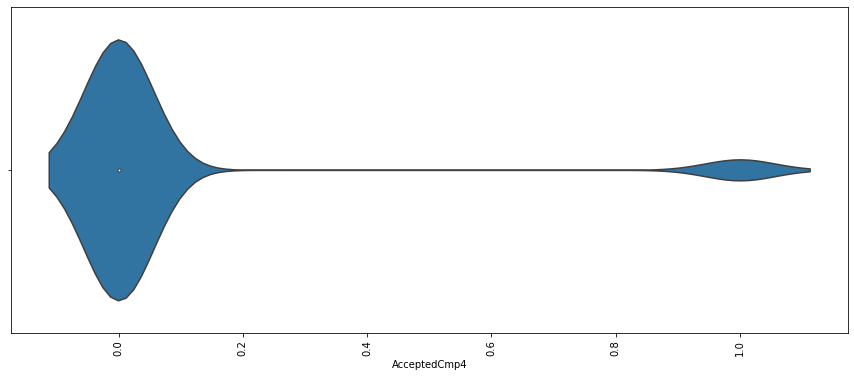

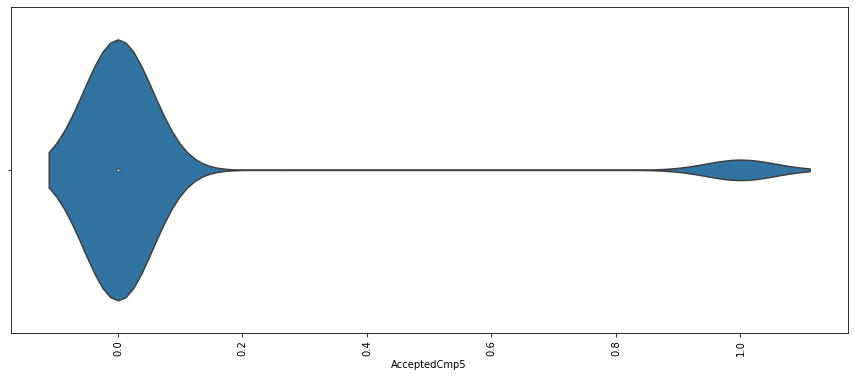

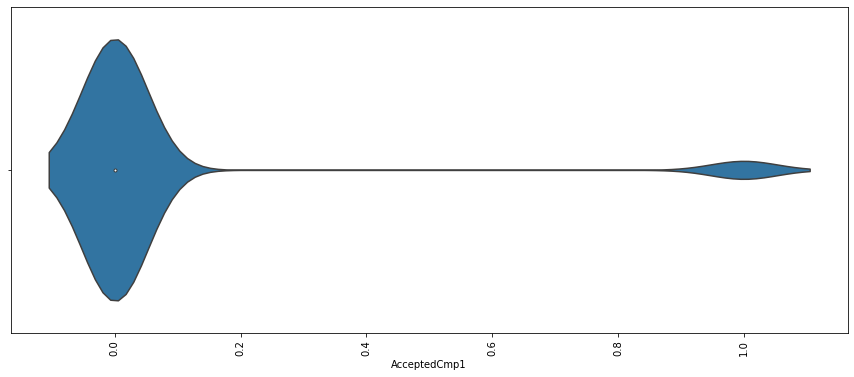

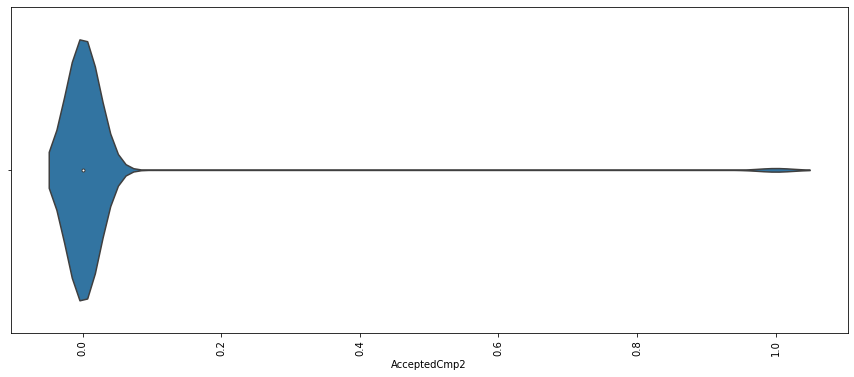

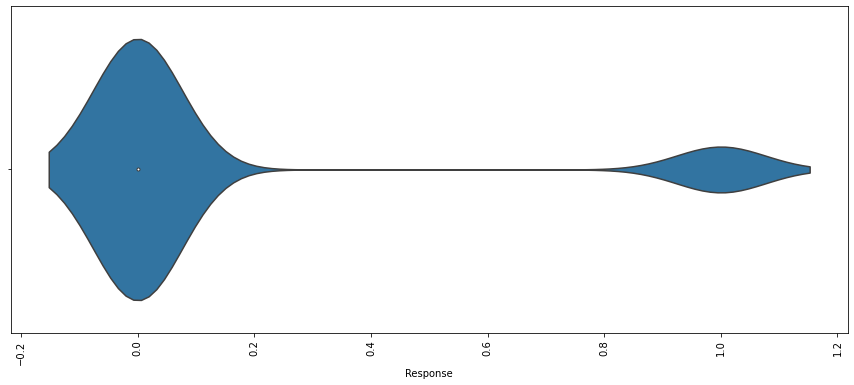

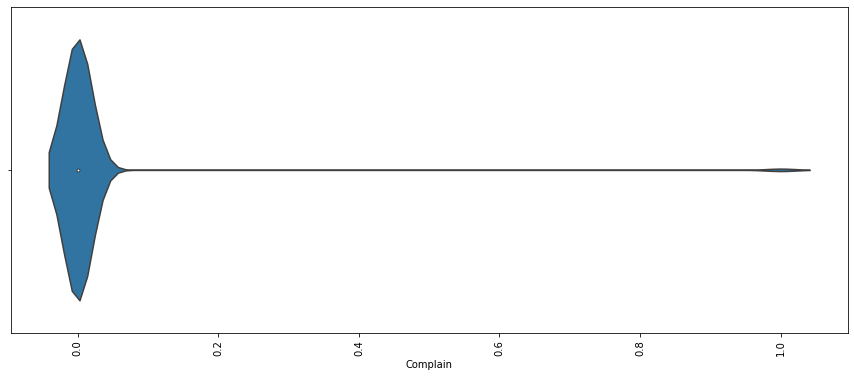

In [17]:
for i in data_num.columns:
    plt.figure(figsize=(15,6))
    sns.violinplot(data_num[i])
    plt.xticks(rotation = 90)
    plt.show()

In [18]:
data.rename(columns={' Income ' : 'Income'}, inplace=True)
data['Income']=data["Income"].str.replace("$","")
data['Income']=data["Income"].str.replace(",","")
data['Income']=data["Income"].astype(float)

In [19]:
data['Income'].head()

0    84835.0
1    57091.0
2    67267.0
3    32474.0
4    21474.0
Name: Income, dtype: float64

In [20]:
data['Income'].tail()

2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, dtype: float64

In [21]:
data['Income'].isnull().sum()/len(data)*100

1.0714285714285714

In [22]:
data['Income']

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

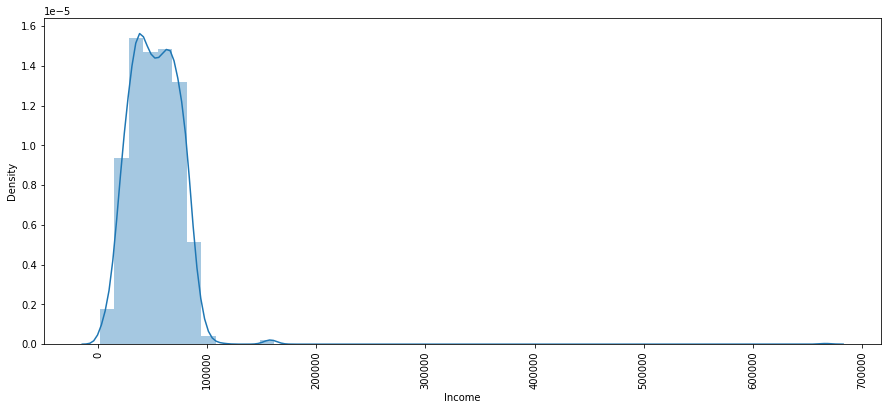

In [23]:
plt.figure(figsize=(15,6))
sns.distplot(data['Income'])
plt.xticks(rotation=90)
plt.show()

In [24]:
data['Income']= data['Income'].fillna(data['Income'].median())
data['Income'].isna().sum()

0

In [25]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [27]:
from datetime import date
data['Age']=date.today().year-data['Year_Birth']

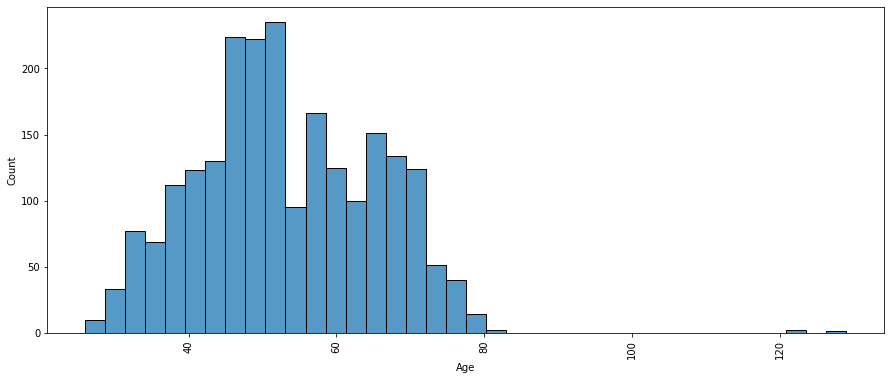

In [28]:
plt.figure(figsize=(15,6))
sns.histplot(x=data['Age'])
plt.xticks(rotation=90)
plt.show()

In [29]:
data2=data[data['Age']>100]

In [30]:
data2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
513,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,4,0,0,0,0,0,0,0,SA,129
827,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,1,0,0,1,0,0,0,0,SP,123
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,5,0,0,0,0,0,0,1,IND,122


In [31]:
data=data[data['Age']<100]
data=data[data['Income']<600000]

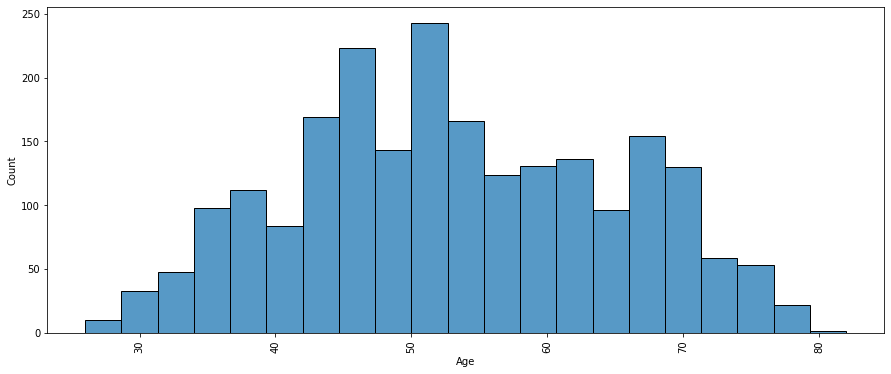

In [32]:
plt.figure(figsize=(15,6))
sns.histplot(x=data['Age'])
plt.xticks(rotation=90)
plt.show()


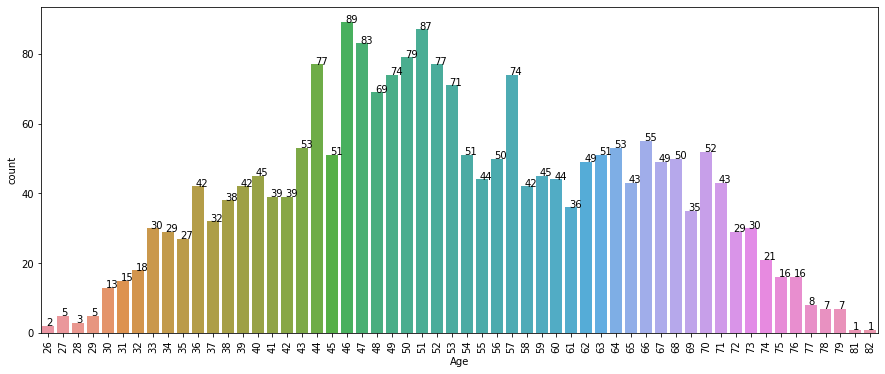

In [33]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x=data['Age']);
for p in ax.patches: 
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.xticks(rotation = 90)
plt.show()

In [34]:
data['Total Amount'] = data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']

In [35]:
data['Total Amount']

0       1190
1        577
2        251
3         11
4         91
        ... 
2235     689
2236      55
2237     309
2238    1383
2239    1078
Name: Total Amount, Length: 2236, dtype: int64

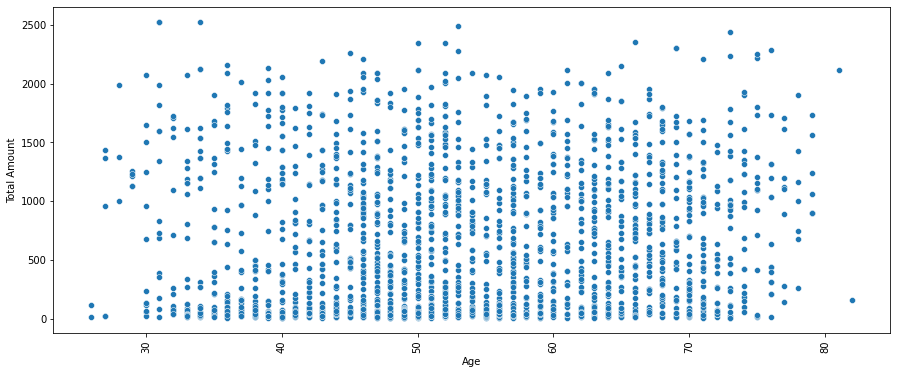

In [36]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=data['Age'],y=data['Total Amount'])
plt.xticks(rotation=90)
plt.show()

In [37]:
data.filter(regex='Mnt',axis=1)

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,189,104,379,111,189,218
1,464,5,64,7,0,37
2,134,11,59,15,2,30
3,10,0,1,0,0,0
4,6,16,24,11,0,34
...,...,...,...,...,...,...
2235,372,18,126,47,48,78
2236,5,10,13,3,8,16
2237,185,2,88,15,5,14
2238,267,38,701,149,165,63


In [38]:
data['PercentWine'] = (data['MntWines']/data['Total Amount'])*100

In [39]:
data['PercentOthers'] = ((data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds'])/data['Total Amount'])*100

In [40]:
data.filter(regex='Percent|Total|MntWines',axis=1)

,MntWines,Total Amount,PercentWine,PercentOthers
0,189,1190,15.882353,84.117647
1,464,577,80.415945,19.584055
2,134,251,53.386454,46.613546
3,10,11,90.909091,9.090909
4,6,91,6.593407,93.406593
...,...,...,...,...
2235,372,689,53.991292,46.008708
2236,5,55,9.090909,90.909091
2237,185,309,59.870550,40.129450
2238,267,1383,19.305857,80.694143


In [41]:
data['Total_Purchase']=data['NumWebPurchases']+data['NumCatalogPurchases']+data['NumStorePurchases']

In [42]:
data['Total_Purchase']

0       14
1       17
2       10
3        3
4        6
        ..
2235    18
2236     4
2237    12
2238    19
2239    17
Name: Total_Purchase, Length: 2236, dtype: int64

In [43]:
data['PergStore'] = (data['NumStorePurchases']/data['Total_Purchase'])*100

data['PergOthers'] = ((data['NumCatalogPurchases']+data['NumWebPurchases'])/data['Total_Purchase'])*100

data.filter(regex='Store|Total_P|Perg',axis=1)

,NumStorePurchases,Total_Purchase,PergStore,PergOthers
0,6,14,42.857143,57.142857
1,7,17,41.176471,58.823529
2,5,10,50.000000,50.000000
3,2,3,66.666667,33.333333
4,2,6,33.333333,66.666667
...,...,...,...,...
2235,11,18,61.111111,38.888889
2236,3,4,75.000000,25.000000
2237,5,12,41.666667,58.333333
2238,10,19,52.631579,47.368421


In [44]:
campaigns = pd.DataFrame(data.iloc[:,20:25].sum(), columns=['amount']).reset_index()

In [45]:
campaigns

,index,amount
0,AcceptedCmp3,163
1,AcceptedCmp4,167
2,AcceptedCmp5,162
3,AcceptedCmp1,144
4,AcceptedCmp2,30


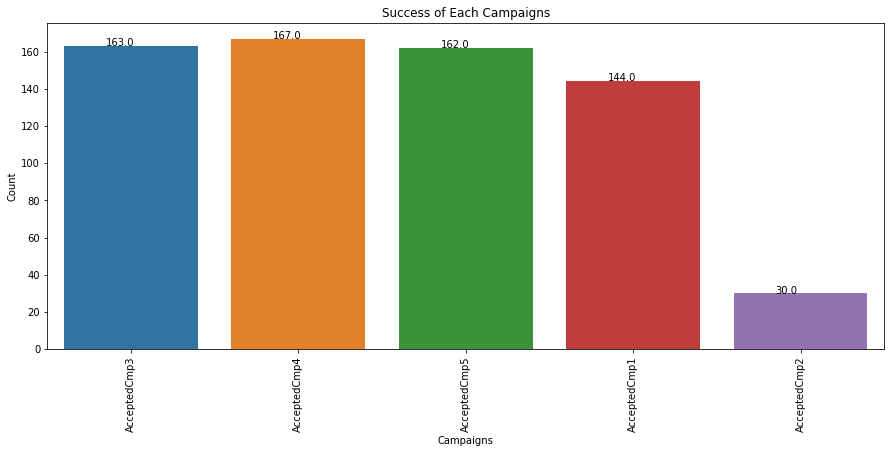

In [46]:
plt.figure(figsize=(15,6))
plt.title("Success of Each Campaigns")
yx = sns.barplot(x='index',y='amount',data=campaigns);
plt.xlabel('Campaigns')
plt.ylabel('Count')
for p in yx.patches: 
    yx.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.xticks(rotation = 90)
plt.show()

In [48]:
revenue = pd.DataFrame(data.iloc[:,9:15].sum(),columns=['rev_generated']).reset_index()

In [49]:
revenue

,index,rev_generated
0,MntWines,680029
1,MntFruits,58753
2,MntMeatProducts,373375
3,MntFishProducts,83931
4,MntSweetProducts,60552
5,MntGoldProds,98346


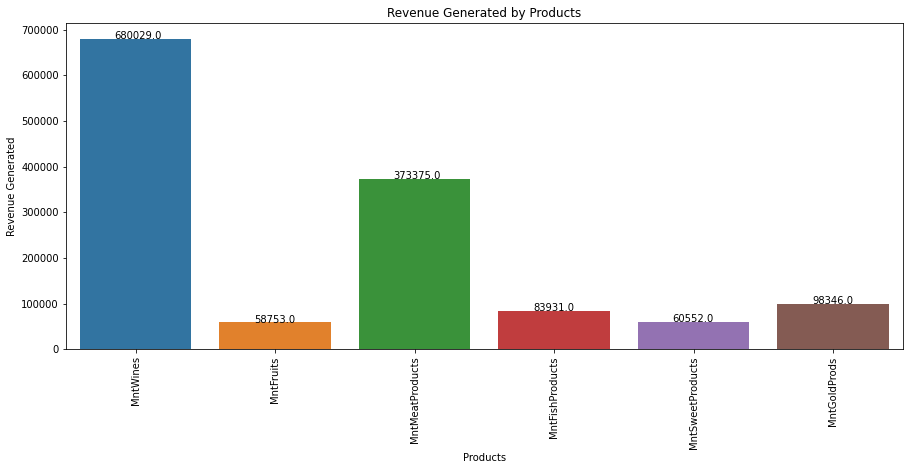

In [51]:
plt.figure(figsize=(15,6))
plt.title("Revenue Generated by Products")
yyx=sns.barplot(x='index',y='rev_generated',data=revenue);
plt.xlabel('Products')
plt.ylabel('Revenue Generated')
for p in yyx.patches: 
    yyx.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.xticks(rotation = 90)
plt.show()

<Figure size 1080x432 with 0 Axes>

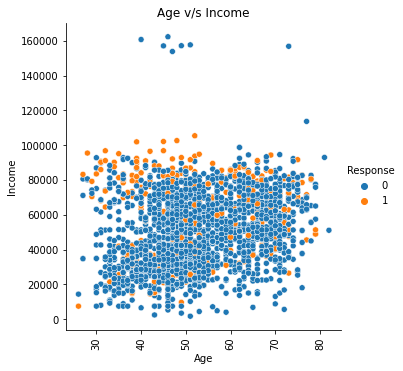

In [53]:
plt.figure(figsize=(15,6))
sns.relplot(x='Age',y='Income',hue='Response',data=data);
plt.title('Age v/s Income');
plt.xticks(rotation = 90)
plt.show()

<Figure size 1080x432 with 0 Axes>

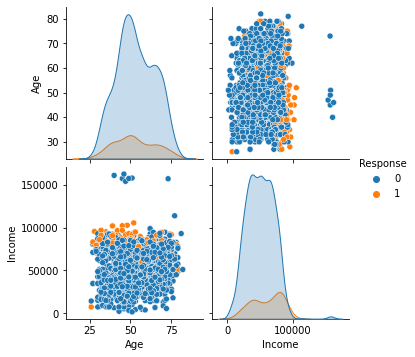

In [54]:
plt.figure(figsize=(15,6))
sns.pairplot(vars=['Age','Income'],hue='Response',data=data);
plt.xticks(rotation=90)
plt.show()

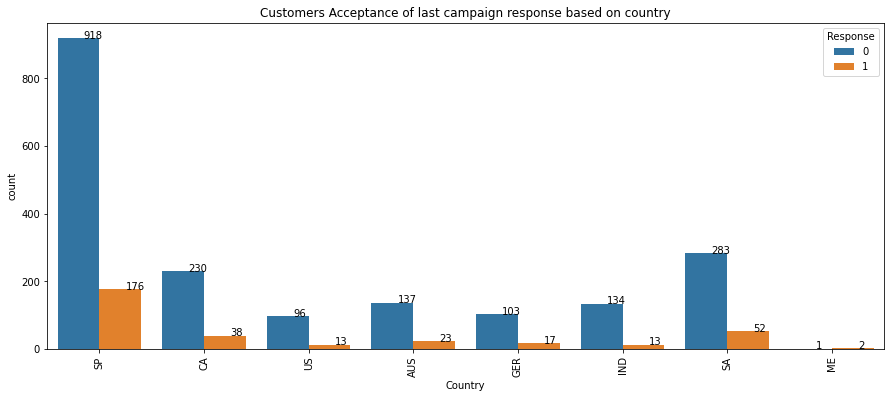

In [55]:
plt.figure(figsize=(15,6))
cs = sns.countplot(x='Country',hue='Response',data=data)
plt.title('Customers Acceptance of last campaign response based on country');
for p in cs.patches: 
    cs.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.xticks(rotation = 90)
plt.show()

In [56]:
data['Dependents']=data['Kidhome']+data['Teenhome']

In [57]:
data['Dependents']

0       0
1       0
2       1
3       2
4       1
       ..
2235    1
2236    1
2237    1
2238    0
2239    2
Name: Dependents, Length: 2236, dtype: int64

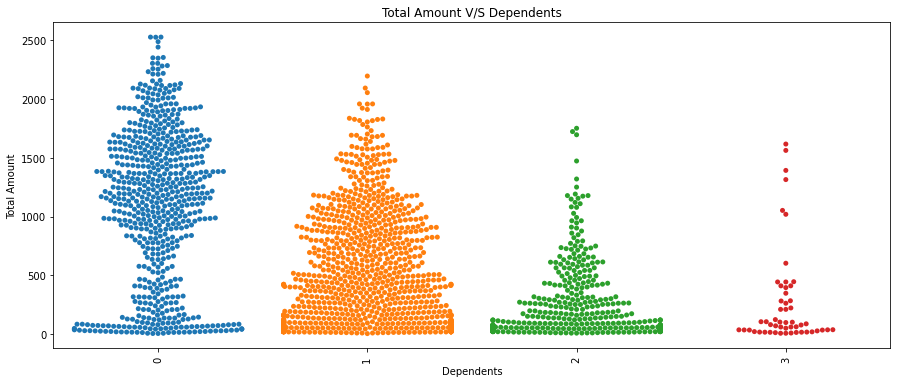

In [58]:
plt.figure(figsize=(15,6))
sns.swarmplot(x='Dependents',y='Total Amount',data=data);
plt.title("Total Amount V/S Dependents");
plt.xticks(rotation=90)
plt.show()

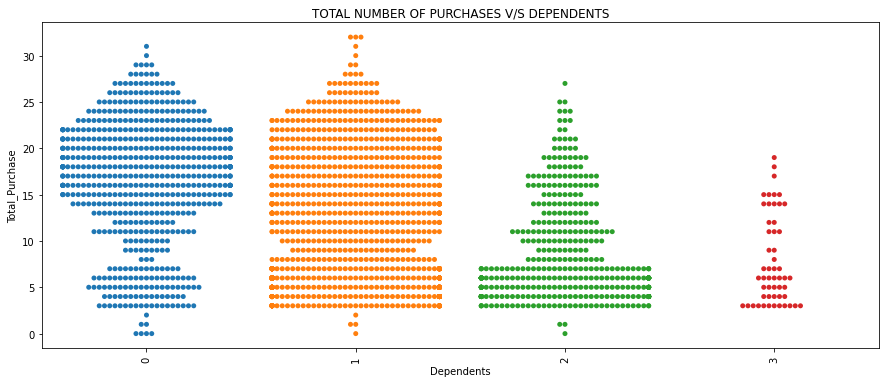

In [59]:
plt.figure(figsize=(15,6))
sns.swarmplot(x='Dependents',y='Total_Purchase',data=data);
plt.title('TOTAL NUMBER OF PURCHASES V/S DEPENDENTS');
plt.xticks(rotation=90)
plt.show()